In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
closed_id = pd.read_csv('PA_close_new.csv')

In [3]:
data_list = []

with open('review.json', 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        data_list.append(data)

review = pd.DataFrame(data_list)

In [6]:
closed_id_review = review[review['business_id'].isin(closed_id['business_id'])]
closed_id_review['date'] = pd.to_datetime(closed_id_review['date'])
latest_dates_index = closed_id_review.groupby('business_id')['date'].idxmax()
latest_data = closed_id_review.loc[latest_dates_index]
latest_data['date'] = pd.to_datetime(latest_data['date'])
latest_data['year'] = latest_data['date'].dt.year
year_counts = latest_data['year'].value_counts()
year_counts = year_counts.sort_index()

C:\Users\rzjin\AppData\Local\Temp\ipykernel_37300\2937252478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_id_review['date'] = pd.to_datetime(closed_id_review['date'])


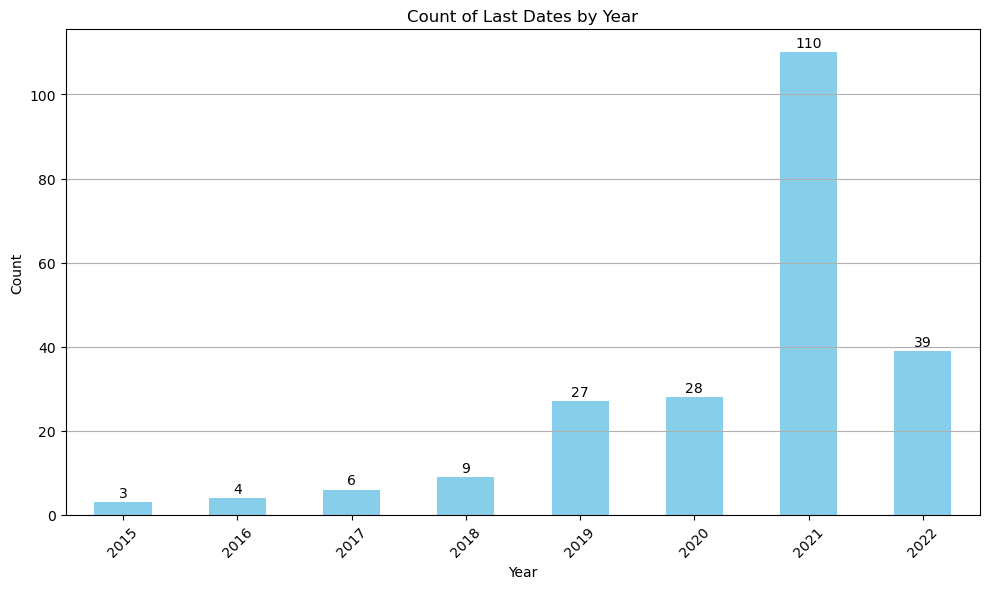

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = year_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Last Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, count in enumerate(year_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()